$\newcommand{\ind}[1]{\left[#1\right]}$

### Model

- Data set
$$ {\cal D} = \{ x_1, \dots  x_N \} $$
- Model with parameter $\theta$
$$ p(\cal D | \theta) $$

<img src="fig13b.png" width='360' align='center'>


### Maximum Likelihood

- Maximum Likelihood (ML)
$$ \theta^{\text{ML}} = \arg\max_{\theta} \log p({\cal D} | \theta) $$
- Predictive distribution
$$ p(x_{N+1} |  {\cal D} ) \approx  p(x_{N+1} |  \theta^{\text{ML}})  $$

### Maximum Aposteriori

- Prior
$$ p(\theta) $$

- Maximum a-posteriori (MAP) : Regularised Maximum Likelihood
$$
\theta^{\text{MAP}} = \arg\max_{\theta} \log p({\cal D} | \theta) p(\theta)
$$

- Predictive distribution
$$ p(x_{N+1} |  {\cal D} ) \approx  p(x_{N+1} |  \theta^{\text{MAP}})  $$

### Bayesian Learning

- We treat parameters on the same footing as all other variables
- We integrate over unknown parameters rather than using point estimates (remember the many-dice example)
 - Self-regularisation, avoids overfitting
 - Natural setup for online adaptation
 - Model selection


- Predictive distribution
\begin{eqnarray}
p(x_{N+1} ,  {\cal D} ) &=& \int d\theta \;\; p(x_{N+1} |  \theta) p( {\cal D}| \theta) p(\theta)  \\
 &=& \int d\theta \;\; p(x_{N+1}|  \theta) p( {\cal D}, \theta)   \\
 &=& \int d\theta \;\; p(x_{N+1}|  \theta) p(  \theta| {\cal D}) p({\cal D})   \\
 &=&  p({\cal D}) \int d\theta \;\; p(x_{N+1}|  \theta) p(  \theta| {\cal D})  \\
p(x_{N+1} |  {\cal D} ) &=& \int d\theta \;\; p(x_{N+1} |  \theta) p(\theta | {\cal D}) 
\end{eqnarray}

The interpretation is that past data provides an 'update' to the recent prior to be used for the current prediction.

- Bayesian learning is just inference ...




### Independent Coin Flips

Suppose we have a coin, flipped several times independently. A vague question one can ask is if one can predict the outcome of the next flip.

It depends. If we already know that the coin is fair, there is nothing that we can learn from past data and indeed the future flips are independent of the previous flips. However, if we don't know the probability of the coin, we could estimate the parameter from past data to create a better prediction. Mathematically, the model is identical to  

<img src="fig13b.png" width='220' align='center'>

Here, $\theta$ is the parameter of the coin.

#### Maximum Likelihood Estimation

We observe the outcome of $N$ coin flips $\{x^{(n)}\}_{n=1\dots N}$ where $x^{(n)} \in \left\{0,1\right\}$. The model is a Bernoulli distribution with parameter $\pi = (\pi_0, \pi_1)$. We have $\pi_0 = 1 - \pi_1$ where $0 \leq \pi_1 \leq 1$. 

\begin{eqnarray}
x^{(n)} & \sim & p(x|\pi) = (1-\pi_1)^{1-x^{(n)} } \pi_1^{x^{(n)} }
\end{eqnarray}

The loglikelihood is 

\begin{eqnarray}
{\cal L}(\pi_1) & = & \sum_{n=1}^N (1- x^{(n)}) \log (1 - \pi_1) + \sum_{n=1}^N x^{(n)} \log (\pi_1)  \\
& = & \log (1 - \pi_1) \sum_{n=1}^N (1- x^{(n)})  + \log (\pi_1) \sum_{n=1}^N x^{(n)}  
\end{eqnarray}

We define the number of $0$'s  
\begin{eqnarray}
c_0 = \sum_{n=1}^N (1- x^{(n)})
\end{eqnarray}
and $1$'s as
\begin{eqnarray}
c_1 = \sum_{n=1}^N  x^{(n)}
\end{eqnarray}

\begin{eqnarray}
{\cal L}(\pi_1) & = & \log (1 - \pi_1) c_0  + \log (\pi_1) c_1  
\end{eqnarray}

We compute the gradient 
\begin{eqnarray}
\frac{\partial}{\partial \pi_1} {\cal L}(\pi_1) & = & - \frac{c_0}{1 - \pi_1} + \frac{c_1}{\pi_1}  = 0 
\end{eqnarray}

The solution is quite predictable
\begin{eqnarray}
\pi_1 & = &\frac{c_1}{c_0 + c_1}  = \frac{c_1}{N}  
\end{eqnarray}

#### Maximum A-posteriori estimation

We need a prior over the probability parameter. One choice is the beta distribution

\begin{eqnarray}
p(\pi_1) & = & \mathcal{B}(\pi_1; \alpha, \beta) =  \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta) } \pi_1^{\alpha-1} (1-\pi_1)^{\beta-1}
\end{eqnarray}

The log joint ditribution of data is
\begin{eqnarray}
\log p(X, \pi_1) & = & \log p(\pi_1) + \log \sum_{n=1}^N \log p(x^{(n)}|\pi_1) \\
& = & \log \Gamma(\alpha + \beta) -\log \Gamma(\alpha) - \log \Gamma(\beta) \\
& & + (\alpha-1) \log \pi_1 + (\beta-1) \log(1-\pi_1) \\
& & + c_1 \log (\pi_1)  + c_0 \log (1 - \pi_1) \\
& = & \log \Gamma(\alpha + \beta) -\log \Gamma(\alpha) - \log \Gamma(\beta) \\
& & + (\alpha + c_1 -1) \log \pi_1 + (\beta + c_0 -1) \log(1-\pi_1) 
\end{eqnarray}

The gradient is 

\begin{eqnarray}
\frac{\partial}{\partial \pi_1} \log p(X, \pi_1)  & = & - \frac{\beta + c_0 -1}{1 - \pi_1} + \frac{\alpha + c_1 -1}{\pi_1}  = 0 
\end{eqnarray}

We can solve for the parameter.
\begin{eqnarray}
\pi_1 (\beta + c_0 -1) & = & (1 - \pi_1) (\alpha + c_1 -1) \\ 
\pi_1 \beta + \pi_1 c_0 - \pi_1 & = & \alpha  + c_1  - 1 - \pi_1 \alpha - \pi_1 c_1 + \pi_1 \\ 
\pi_1  & = & \frac{\alpha - 1  + c_1}{\alpha + \beta  - 2 + c_0 + c_1}    \\ 
\end{eqnarray}

When the prior is flat, i.e., when $\alpha = \beta = 1$, MAP and ML solutions coincide.

#### Full Bayesian inference

We infer the posterior

\begin{eqnarray}
p(\pi_1| X) & = & \frac{p(\pi_1, X)}{p(X)} 
\end{eqnarray}


The log joint density is 
\begin{eqnarray}
\log p(X, \pi_1) & = & \log \Gamma(\alpha + \beta) -\log \Gamma(\alpha) - \log \Gamma(\beta) \\
& & + (\alpha + c_1 -1) \log \pi_1 + (\beta + c_0 -1) \log(1-\pi_1) 
\end{eqnarray}

At this stage, we may try to evaluate the integral 
$$
p(X)  =  \int d\pi_1 p(X, \pi_1) 
$$

Rather than trying to evaluate this integral directly, a simple approach is known as 'completing the square': we add an substract terms to obtain an expression that corresponds to a known, normalized density. This typically involves adding and substracting an expression that will make us identify a normalized density. 

\begin{eqnarray}
\log p(X, \pi_1) & = & \log \Gamma(\alpha + \beta) -\log \Gamma(\alpha) - \log \Gamma(\beta) \\
& & - \log \Gamma(\alpha + \beta + c_0 + c_1) + \log \Gamma(\alpha + c_1) + \log \Gamma(\beta + c_0) \\
& & + \log \Gamma(\alpha + \beta + c_0 + c_1) - \log \Gamma(\alpha + c_1) - \log \Gamma(\beta + c_0) \\
& & + (\alpha + c_1 -1) \log \pi_1 + (\beta + c_0 -1) \log(1-\pi_1) \\
& = & \log \Gamma(\alpha + \beta) -\log \Gamma(\alpha) - \log \Gamma(\beta) \\
& & - \log \Gamma(\alpha + \beta + c_0 + c_1) + \log \Gamma(\alpha + c_1) + \log \Gamma(\beta + c_0) \\
& & + \log \mathcal{B}(\alpha + c_1, \beta + c_0) \\
& = & \log p(X) + \log p(\pi_1| X)
\end{eqnarray}

From the resulting expression, taking the exponent on both sides we see that 
\begin{eqnarray}
p(\pi_1| X) & = & \mathcal{B}(\alpha + c_1, \beta + c_0) \\
p(X) & = & \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \frac{\Gamma(\alpha + c_1)\Gamma(\beta + c_0)}{\Gamma(\alpha + \beta + c_0 + c_1)}
\end{eqnarray}

##### Alternative Derivation
Alternatively, we may directly write
\begin{eqnarray}
p(X, \pi_1) & = & \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}   \pi_1^{(\alpha + c_1 -1)} (1-\pi_1)^{(\beta + c_0 -1)} 
\end{eqnarray}

\begin{eqnarray}
p(X) &=& \int d\pi_1 p(X, \pi_1)  =  \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \int d\pi_1  \pi_1^{(\alpha + c_1 -1)} (1-\pi_1)^{(\beta + c_0 -1)} 
\end{eqnarray}


From the definition of the beta distribution, we can arrive at the 'formula' for the integral 
\begin{eqnarray}
1 &=& \int d\pi \mathcal{B}(\pi; a, b) \\
& = & \int d\pi \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \pi^{(a -1)} (1-\pi)^{(b -1)} \\
\frac{\Gamma(a)\Gamma(b)}{\Gamma(a + b)} & = & \int d\pi \pi^{(a -1)} (1-\pi)^{(b -1)}
\end{eqnarray}
Just substitute $a = \alpha + c_1$ and $b = \beta + c_0$

#### An Approximation
For large $x$, we have the following approximation
\begin{eqnarray}
\log \Gamma(x + a) - \log \Gamma(x) & \approx & a \log(x) \\
\Gamma(x + a)  & \approx & \Gamma(x) x^a \\
\end{eqnarray}

When $c_0$ and $c_1$ are large, we obtain:

\begin{eqnarray}
p(X) & \approx & \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} \frac{\Gamma(c_1)\Gamma(c_0)c_0^{\beta}c_1^{\alpha}}{\Gamma(c_0 + c_1)(c_0+c_1)^{\alpha + \beta}}
\end{eqnarray}

Let $\hat{\pi}_1 = c_1/(c_0+c_1)$ and $N = c_0 + c_1$, we have
\begin{eqnarray}
p(X) & \approx &  \frac{\Gamma(c_1)\Gamma(c_0)}{\Gamma(c_0 + c_1)} (1-\hat{\pi}_1) \hat{\pi}_1 \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} (1-\hat{\pi}_1)^{\beta-1}\hat{\pi}_1^{\alpha-1}
\end{eqnarray}

### Fair/Fake Coin

We consider the folowing problem: Given a sequence of coin tosses $X = \{x^{(n)}\}_{n=1\dots N}$, determine if the coin is fair or fake.

This can be cast as a model selection problem:

\begin{eqnarray}
\pi_1|m & \sim & \left\{ \begin{array}{cc} \delta(\pi_1 - 0.5) & m = 0\\ \mathcal{B}(\pi; a, b) & m = 1 \end{array} \right.
\end{eqnarray}
For $n = 1\dots N$
\begin{eqnarray}
x^{(n)}| \pi_1 & \sim & \mathcal{BE}(x; \pi_1)
\end{eqnarray}

This model defines the following:
- The indicator $m$, that denotes if the coin is fake,
- What a fake coin is: a fake coin is one that has an arbitrary probability $\pi_1$ between $0$ and $1$. 
- What a fair coin is: a fair coin has $\pi_1 = 0.5$

We need to calculate the marginal likelihoods for $m=0$ and $m=1$
\begin{eqnarray}
p(X| m) & = & \int d\pi_1 p(X | \pi_1) p(\pi_1|m)
\end{eqnarray}

###### Not Fake
\begin{eqnarray}
p(X| m) & = & \int d\pi_1 p(X| \pi_1) \delta(\pi_1 - 0.5) \\
& = & \prod_{n=1}^N \left(\frac{1}{2}\right)^{x^{(n)}} \left(\frac{1}{2}\right)^{1-x^{(n)}} = \frac{1}{2^N}
\end{eqnarray}

###### Fake

\begin{eqnarray}
p(X| m) & = & \int d\pi_1 p(\pi_1; a, b) \prod_{n=1}^{N} p(x^{(n)}| \pi_1)  \\
& = &  \int d\pi_1 \left(\prod_{n=1}^N \left(1-\pi_1\right)^{1-x^{(n)}} \pi_1^{x^{(n)}} \right) \mathcal{B}(\pi; a, b) \\
& = & \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \int d\pi_1 \left(1-\pi_1\right)^{c_0+a-1} \pi_1^{c_1+b-1} \\
& = & \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \frac{\Gamma(c_0+a)\Gamma(c_1+b)}{\Gamma(c_0 + c_1 +a + b)}
\end{eqnarray}

The log-odds is the ratio of marginal likelihoods

$$
l(X) = \log\left( \frac{p(X|m = \text{Fair})}{p(X|m = \text{Fake})} \right)
$$

If $l(X)>0$, we may conclude that the coin is fair and biased when $l<0$.

In [197]:
import numpy as np
import scipy.special as sps

def log_odds(c_0, c_1, a, b):
    # Total number of tosses
    N = c_0 + c_1
    
    M_fair = N*np.log(0.5)
    M_fake = sps.gammaln(a+b) - sps.gammaln(a) - sps.gammaln(b) +  sps.gammaln(c_0+a) + sps.gammaln(c_1+b) - sps.gammaln(N+a + b) 
    return M_fair - M_fake

# Number of Zeros observed
c_0 = 6
# Number of Ones
c_1 = 1

# Prior
a = 1
b = 1


print('log_odds = ', log_odds(c_0, c_1, a, b) )


log_odds =  -0.826678573184


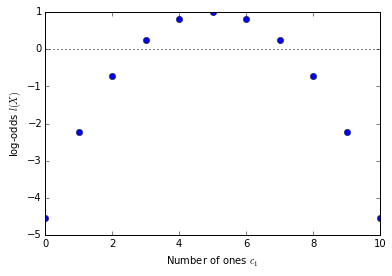

In [126]:
a = 1
b = 1
N = 10

l = np.zeros(N+1)

for c in range(0,N+1):
    l[c] = log_odds(N-c, c, a, b)

plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

We can visualize the region where we would decide that the coin is fake by plotting the points where the log-odds is negative.

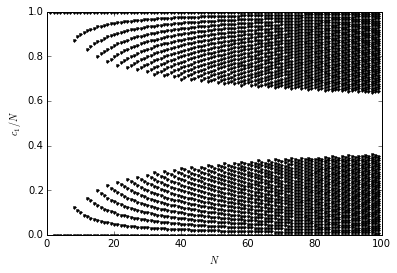

In [185]:
a = 0.1
b = 0.1



for N in range(1, 100):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        l[c] = log_odds(N-c, c, a, b)
    
    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,N+1)/N
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.k')
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()

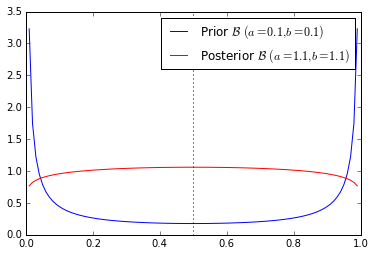

In [187]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.special import gammaln

def log_beta_pdf(x, a, b):
    return - gammaln(a) - gammaln(b) + gammaln(a+b) + np.log(x)*(a-1) + np.log(1-x)*(b-1) 

x = np.arange(0.01,1,0.01)

c_0 = 1
c_1 = 1
N = c_0 + c_1

pi_ML = c_1/N

plt.plot(x, np.exp(log_beta_pdf(x, a, b)), 'b')
plt.plot(x, np.exp(log_beta_pdf(x, a+c_1, b+c_0)), 'r')
yl = plt.gca().get_ylim()
plt.plot([pi_ML, pi_ML], yl , 'k:')
plt.legend(["Prior $\cal B$ $(a={}, b={})$".format(a,b), "Posterior $\cal B$ $(a={}, b={})$".format(a+c_1, b+c_0)], loc="best")
plt.show()

### Estimating a Categorical distribution

#### Maximum Likelihood Estimation


We observe a dataset $\{x^{(n)}\}_{n=1\dots N}$. The model for a single observation is a categorical distribution with parameter $\pi = (\pi_1, \dots, \pi_S)$ where 

\begin{eqnarray}
x^{(n)} & \sim & p(x|\pi) = \prod_{s=1}^{S} \pi_s^{\ind{s = x^{(n)}}}
\end{eqnarray}
where $\sum_s \pi_s  = 1$.

The loglikelihood of the entire dataset is

\begin{eqnarray}
{\cal L}(\pi_1,\dots,\pi_S) & = & \sum_{n=1}^N\sum_{s=1}^S \ind{s = x^{(n)}} \log \pi_s
\end{eqnarray}
This is a constrained optimisation problem.
Form the Lagrangian
\begin{eqnarray}
\Lambda(\pi, \lambda) & = & \sum_{n=1}^N\sum_{s'=1}^S \ind{s' = x^{(n)}} \log \pi_{s'}  + \lambda \left( 1 - \sum_{s'} \pi_{s'} \right ) \\
\frac{\partial \Lambda(\pi, \lambda)}{\partial \pi_s} & = & \sum_{n=1}^N \ind{s = x^{(n)}} \frac{1}{\pi_s} - \lambda = 0 \\
\pi_s & = & \frac{\sum_{n=1}^N \ind{s = x^{(n)}}}{\lambda}
\end{eqnarray}

We solve for $\lambda$
\begin{eqnarray}
1 & = & \sum_s \pi_s = \frac{\sum_{s=1}^S \sum_{n=1}^N \ind{s = x^{(n)}}}{\lambda} \\
\lambda & = & \sum_{s=1}^S \sum_{n=1}^N \ind{s = x^{(n)}} =  \sum_{n=1}^N 1 = N
\end{eqnarray}

Hence
\begin{eqnarray}
\pi_s & = & \frac{\sum_{n=1}^N \ind{s = x^{(n)}}}{N}
\end{eqnarray}

#### Maximum A-Posteriori Estimation


#### Full Bayesian Inference

Visualizing the Dirichlet [http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/]

In [198]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from functools import reduce
from scipy.special import gammaln

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)


# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        self._alpha = np.array(alpha)
        self._coef = gammaln(np.sum(self._alpha)) - np.sum(gammaln(self._alpha))
    def log_pdf(self, x):
        return self._coef + np.sum(np.log(x)*(self._alpha - 1)) 
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        return np.exp(self.log_pdf(x))
        
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

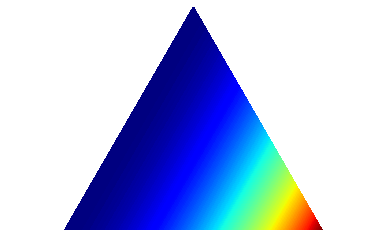

In [199]:
draw_pdf_contours(Dirichlet([1, 3, 1]))

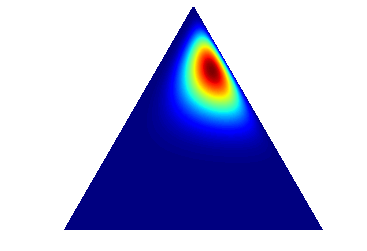

In [156]:
draw_pdf_contours(Dirichlet([1.99, 3.99, 10.99]))

### Change point
Coin switch

Coal Mining Data
 Single Change Point
 Multiple Change Point

In [171]:
%connect_info

{
  "key": "5fe2a052-2599-465d-96fa-793a58b02ea2",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "shell_port": 65197,
  "stdin_port": 65199,
  "ip": "127.0.0.1",
  "hb_port": 65201,
  "control_port": 65200,
  "iopub_port": 65198
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing kernel-457030b1-3d25-4222-9094-06fb4bbdbefe.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.
